Heidy Michelle Ortiz Alvarez

In [ ]:
import pandas as pd

In [3]:
# Cambia la ruta a donde tengas el archivo
file_path = r"C:\Users\miche\archive (1)\heart_cleveland_upload.csv" 

In [5]:
# Cargar los datos
data = pd.read_csv(file_path)

In [7]:
# Verifica que los datos se hayan cargado correctamente
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [9]:
# Resumen de los datos
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [11]:
# Describir los datos numéricos
print(data.describe())



              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

In [13]:
# Verificar valores faltantes
print(data.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [17]:
# Visualizar la distribución de la variable objetivo
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
# Verifica que los datos se hayan cargado correctamente
print(data.head())
print(data.columns)  # Lista todas las columnas para ver si 'target' está presente


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


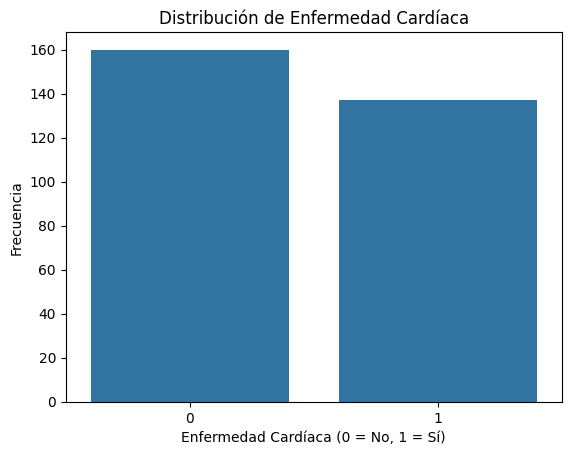

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de la distribución de la variable objetivo 'condition'
sns.countplot(x='condition', data=data)
plt.title('Distribución de Enfermedad Cardíaca')
plt.xlabel('Enfermedad Cardíaca (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.show()


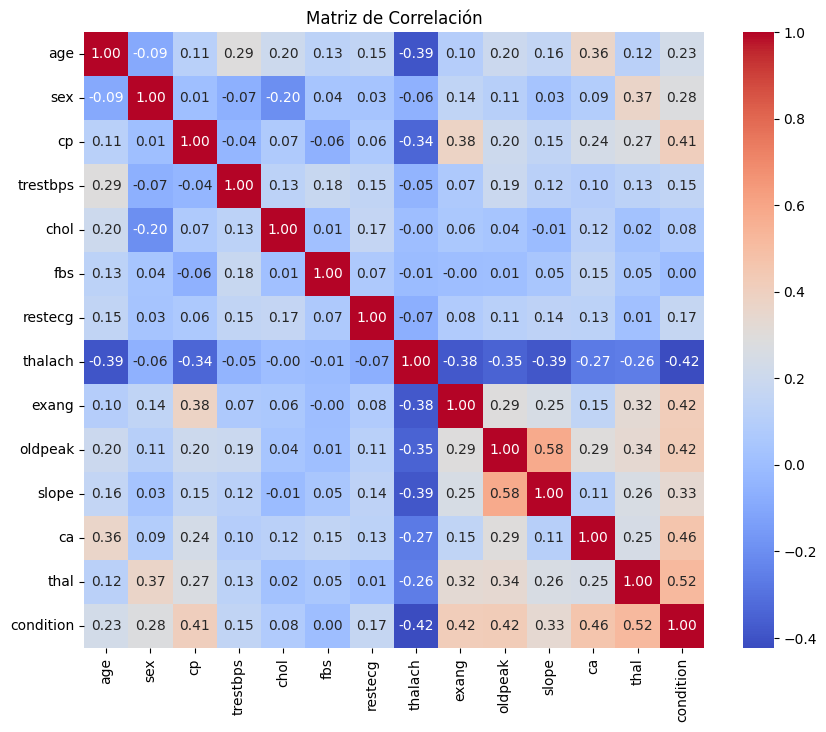

In [25]:
# Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [27]:
# Comprobar y eliminar filas con valores faltantes si es necesario
data.dropna(inplace=True)

In [29]:
# Convertir variables categóricas si hay (ejemplo: sexo)
data['sex'] = data['sex'].map({0: 'Femenino', 1: 'Masculino'})


In [35]:
from sklearn.feature_selection import SelectKBest, chi2

X = data.drop('condition', axis=1)  # Características
y = data['condition']  # Variable objetivo


In [53]:
import os

file_path = r"C:\Users\miche\archive (1)\heart_cleveland_upload.csv" 
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print("Datos cargados correctamente.")
else:
    print("El archivo no se encontró en la ruta especificada.")


Datos cargados correctamente.


In [47]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

In [63]:
# Convertir las variables categóricas a variables dummy
data = pd.get_dummies(data, drop_first=True)  # 'drop_first' evita la trampa de la multicolinealidad

In [65]:
# Separar las características (X) y la variable objetivo (y)
X = data.drop('condition', axis=1)  # Características
y = data['condition']  # Variable objetivo


In [67]:
# Seleccionar las mejores características
selector = SelectKBest(score_func=chi2, k='all')  # Selecciona todas para revisar
X_new = selector.fit_transform(X, y)

In [69]:
# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()].tolist()
print("Características seleccionadas:", selected_features)

Características seleccionadas: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)


In [77]:
# Imprimir la matriz de confusión
print(confusion_matrix(y_test, y_pred))

[[23  9]
 [ 7 21]]


In [79]:
# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



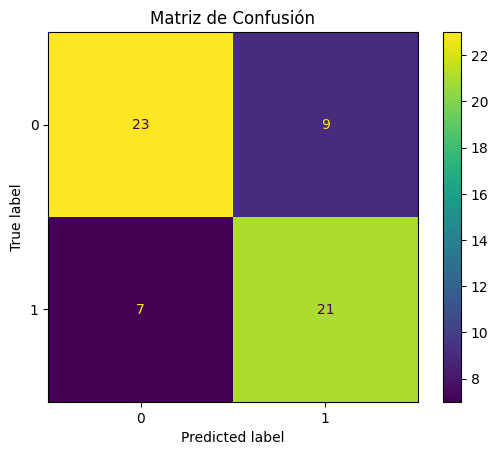

In [81]:
# Gráfico de matriz de confusión
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title('Matriz de Confusión')
plt.show()